# ***Boston Homes Part1***
***
***DESCRIPTION***

A real estate company wants to build homes at different locations in Boston. They have data for historical prices but haven’t decided the actual prices yet. They want to price the homes so that they are affordable to the general public.
Objective:

- Import the Boston data from sklearn and read the description using DESCR.
- Analyze the data and predict the approximate prices for the houses.

The required data set for this project is inbuilt in Python sklearn package

## ***Import Libraries***

In [50]:
#os specifics and versions
import os
import sys
assert sys.version_info >= (3,5)
#arrays and dataframes operations 
import numpy as np
import pandas as pd
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline 
#consistent plot sizes
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#To accommodate maximum number of colums in Jupyter
pd.options.display.max_columns = False
#statistical package
import statistics

## ***Load Data & Basic Exploration***

In [51]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [53]:
dataset = pd.DataFrame(boston.data,columns=columns)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [54]:
#add the target feature -- > MEDV
dataset['MEDV'] =  boston.target
dataset.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [55]:
#check the info .. 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [56]:
#check basic stats 
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## ***Data Analysis***

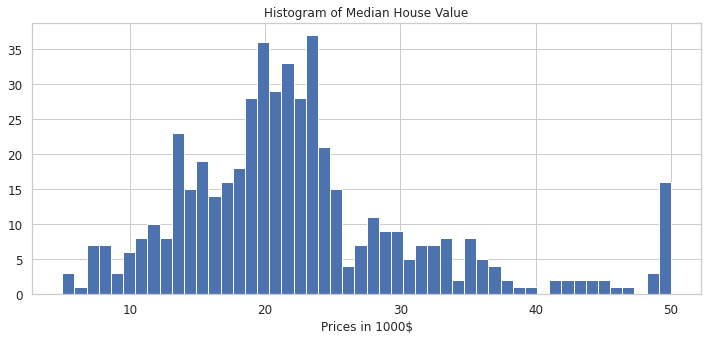

In [57]:
#check the median price target
plt.hist(dataset['MEDV'],bins=50)
plt.title('Histogram of Median House Value')
plt.xlabel('Prices in 1000$')
plt.show()

In [58]:
#test for normality
from scipy.stats import normaltest
stat,p = normaltest(dataset['MEDV'])
print('Stat=%.3f p=%.2f' % (stat,p))
if p > 0.05:
    print('Gaussian Distribution')
else:
    print('Non Gaussian Distribution')

Stat=90.975 p=0.00
Non Gaussian Distribution


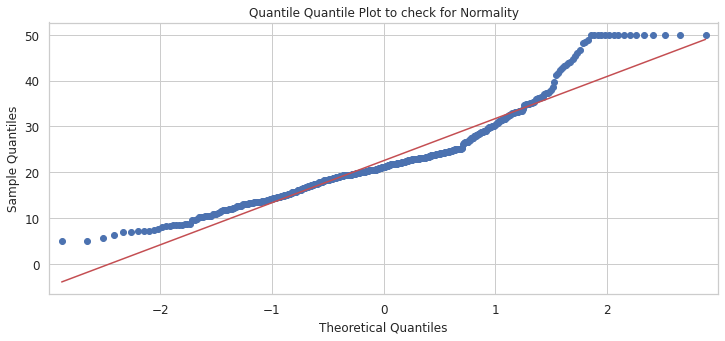

In [59]:
from statsmodels.graphics.gofplots import qqplot
qqplot(dataset['MEDV'], line='s')
plt.title('Quantile Quantile Plot to check for Normality')
plt.show()

***from the qq plot it is clear that the target data is not normal***

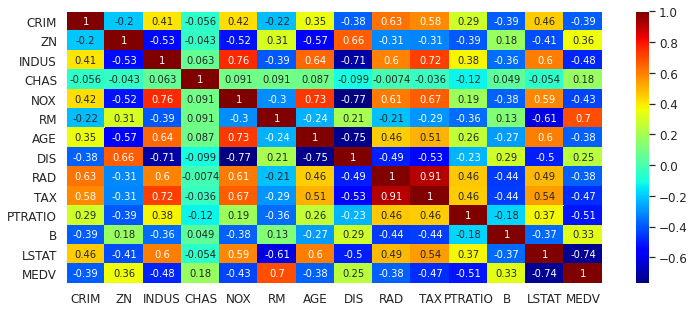

In [60]:
#heatmap of all the features
sns.heatmap(dataset.corr(),annot=True,cmap=plt.get_cmap('jet'))
plt.show()

In [61]:
#check the correlation of the features with the target variable 
dataset.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [ ]:
#check the pairplot
boston_num_features = dataset.select_dtypes(exclude='object').columns.tolist()
sns.pairplot(dataset[boston_num_features])
plt.show()

In [ ]:
dataset.skew()

In [ ]:
dataset.hist(bins=30,figsize=(15,15))
plt.show()

In [ ]:
#convert the CHAS variable to object type -- > for modeling apply label encoder
dataset['CHAS'] = dataset['CHAS'].astype(str)

In [ ]:
dataset.info()

In [ ]:
#one hot encoding for the categorical feature CHAS
dummy_chas = pd.get_dummies(dataset['CHAS'],drop_first=True)
dataset =  pd.concat([dataset,dummy_chas],axis=1)
dataset.drop('CHAS',axis=1,inplace=True)

In [ ]:
dataset.head(2)

In [ ]:
dataset.rename(columns={'1.0':'CHAS_dummy'},inplace=True)

In [ ]:
dataset.columns

In [ ]:
dataset.head(1)

## ***Check for Multicollinearity***

In [ ]:
#For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
boston_num_features = dataset.select_dtypes(exclude='object').columns.tolist()
X = dataset[boston_num_features].drop('MEDV',axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [ ]:
#print the vif highest to lowest .. 
vif.sort_values(by='VIF Factor',ascending=False)

_PTRATIO, RM and NOX have high variance inflation factors. In the beginning the model will be built with all the features and then in the next iteration a few of the features with high VIF can be dropped and checked for performance._ 

## ***Data Preparation for Modeling***

In [ ]:
#import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
#import the models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#evaluation or performance metrics
from sklearn.metrics import mean_squared_error
#cross validation
from sklearn.model_selection import cross_val_score
#grid search
from sklearn.model_selection import GridSearchCV

In [ ]:
#split the dataset into train and test set 
X = dataset.drop('MEDV',axis=1)
y = dataset['MEDV']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#transformation of the data 
pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## ***Modeling***
Train two models - one based on Linear Regression and other based on Ensemble method. 

In [ ]:
#Train a Linear Model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
linmodel_predict = lin_reg.predict(X_test)
linmodel_predict_train = lin_reg.predict(X_train)

In [ ]:
mse = mean_squared_error(y_test,linmodel_predict)
mse_train = mean_squared_error(y_train,linmodel_predict_train)
print('Linear Model Test MSE: %.2f & Test RMSE:%.2f'%(mse,np.sqrt(mse)))
print('Linear Model Train MSE: %.2f & Train RMSE:%.2f'%(mse_train,np.sqrt(mse_train)))

In [ ]:
#Train a Random Forest Regressor
rf_reg =  RandomForestRegressor(random_state=42)
rf_reg.fit(X_train,y_train)
rfmodel_predict = rf_reg.predict(X_test)
rfmodel_predict_train = rf_reg.predict(X_train)

In [ ]:
mse = mean_squared_error(y_test,rfmodel_predict)
mse_train = mean_squared_error(y_train,rfmodel_predict_train)
print('Random Forest Model MSE: %.2f & RMSE:%.2f'%(mse,np.sqrt(mse)))
print('Random Forest Model Train MSE: %.2f & Train RMSE:%.2f'%(mse_train,np.sqrt(mse_train)))

In [ ]:
#cross validation using both the estimators
rf_scores = cross_val_score(rf_reg,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
lin_scores = cross_val_score(lin_reg,X_train,y_train,cv=10,scoring='neg_mean_squared_error')

In [ ]:
#check the mean score of cross validation
np.mean(-rf_scores)

In [ ]:
np.mean(-lin_scores)

***Linear Model does not perform as good as the Random Forest model. This is clear from the cross validation score and also based on the RMSE score.*** 

## ***Hyperparameter tuning using Grid Search***

In [ ]:
from pprint import pprint

In [ ]:
pprint(rf_reg)

In [ ]:
#list of dictionaries
param_grid = [{'n_estimators':[100,300]},{'max_depth':[3,5,9]}]
grid_cv = GridSearchCV(estimator=rf_reg,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5)
grid_cv.fit(X_train,y_train)             


In [ ]:
grid_cv.best_params_

In [ ]:
#Train a Random Forest Regressor
rf_reg =  RandomForestRegressor(random_state=42,n_estimators=100,max_depth=9)
rf_reg.fit(X_train,y_train)
rfmodel_predict = rf_reg.predict(X_test)
rfmodel_predict_train = rf_reg.predict(X_train)

In [ ]:
mse = mean_squared_error(y_test,rfmodel_predict)
mse_train = mean_squared_error(y_train,rfmodel_predict_train)
print('Random Forest Model Test MSE: %.2f  &  Test RMSE:%.2f'%(mse,np.sqrt(mse)))
print('Random Forest Model Train MSE: %.2f & Train RMSE:%.2f'%(mse_train,np.sqrt(mse_train)))

## ***Feature Selection***
_for interest sake, conduct a feature selection strategy as we investigated multicollinearity earlier_

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
#build step forward feature selection 
sfs1 = sfs(lin_reg,k_features=7,forward=True,floating=False,verbose=1,scoring='r2',cv=10)
#perform feature selection
sfs1.fit(X_train,y_train)

In [ ]:
feature_columns = list(sfs1.k_feature_idx_)
print(feature_columns)

In [ ]:
X.columns

***So most important features according to forward feature selection are NOX,RM,DIS,RAD,TAX,PTRATIO and LSTAT***

## ***Miscellaneous***

In [ ]:
#retrieve all the scoring options in cross validation
from sklearn.metrics import SCORERS

In [ ]:
sorted(SCORERS.keys())

In [ ]:
#Regularized Linear Models 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

In [ ]:
#fit the linear model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg_pred = lin_reg.predict(X_test)

In [ ]:
#fit the Lasso model
lass_reg = Lasso(alpha=0.5)
lass_reg.fit(X_train,y_train)
lass_reg_pred = lass_reg.predict(X_test)

In [ ]:
#fit the elastic net
elas_reg = ElasticNet(l1_ratio=0.4)
elas_reg.fit(X_train,y_train)
elas_reg_pred = elas_reg.predict(X_test)

In [ ]:
predictions = {'Linear Model':lin_reg_pred,'Lasso Model':lass_reg_pred,'ElasticNet Model':elas_reg_pred}

In [ ]:
for keys,pred in predictions.items():
    mse =  mean_squared_error(y_test,pred)
    print('%s MSE: %.3f & RMSE %.3f' %(keys,mse,np.sqrt(mse)))